In [49]:

%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib.pyplot import subplots, savefig
import richardsplot as rplot

from utilities.analysis import pixellc, plotting
from utilities.ccd import CCD
from utilities.containers import *
from utilities.conversions import magToFlux

In [50]:
cmap = rplot.palettable.colorbrewer.diverging.PuOr_11.mpl_colormap

# an HDF5 File with all the pixel data from the campaign is needed
contact jmoreno3663@gmail.com for the files

In [51]:
pixmapfile = "/media/jackeline/UUI/PixelMaps/K2_target_pixels.hdf5"

In [119]:
def create_pixel_map(gen,lc):
    
    ccd = gen.ccd

    #Make the Full Image Map
    fig, ax = subplots(1,1, figsize=(16,9))
    im = plotting.plot_pixel_lc(ax, lc[:,:,2], smooth=120, image=True,
                          aspect='auto', cmap=cmap, vmin=-1, vmax=1)
    plotting.format_pixel_image(ax, im, lc.shape[0])
    ax.set_title("Median Pixel Light Curves M{}.{}".format(ccd.module, ccd.channel),
                fontsize=30)
    ax.plot(0, 0, "-", label="M{}.{}".format(ccd.module, ccd.channel+1))    
    ax.legend(fontsize = 50, frameon=False, loc = 8, handlelength=0, handletextpad=0,)
    
    #Make the differenced image map
    fig, ax = subplots(1,1, figsize=(16,9))
    im = plotting.plot_pixel_lc(ax, lc[:,:,2], smooth=120, image=True,
                          differenced=True, aspect='auto', cmap=cmap, vmin=-1, vmax=1)
    plotting.format_pixel_image(ax, im, lc.shape[0])
    ax.set_title("Differenced Median Pixel Light Curves M{}.{}".format(ccd.module, ccd.channel),
                fontsize=30)
    ax.plot(0, 0, "-", label="M{}.{}".format(ccd.module, ccd.channel+1))    
    ax.legend(fontsize = 50, frameon=False, loc = 8, handlelength=0, handletextpad=0,)


## Single Chanel K2 Intensity Map of Systematics 

In [69]:
ccd = CCD(module=11, channel=3, field='FLUX', campaign=8)
            
cont = PixelMapContainer.from_hdf5(pixmapfile, ccd)
gen = PixMapGenerator(cont)
print "Making", ccd

    
ccd = gen.ccd
flux_range = map(magToFlux,(50,1))
percentiles = np.linspace(0, 100, 300)

lc = pixellc.get_pixel_lc(gen, percentiles, flux_range=flux_range)


Making CCD(module=11, channel=3, field='FLUX', campaign=8)


In [79]:
flux_range

[1.0978657793955336e-10, 4370682390.8266735]

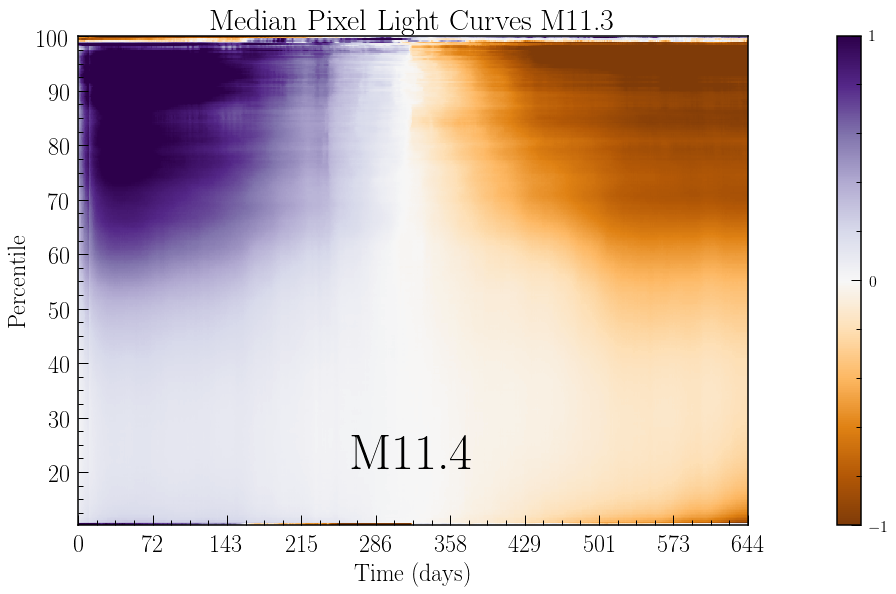

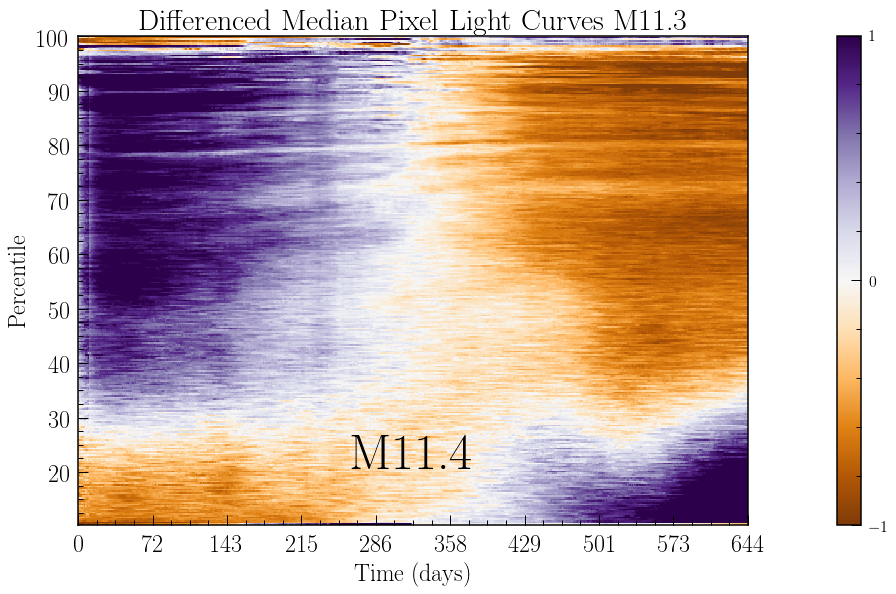

In [54]:
create_pixel_maps(gen,lc)

# Flux binned lightcurves

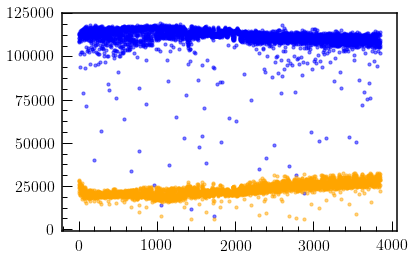

In [70]:
plt.scatter(xrange(len(lc[:,-1,2])),lc[:,-1,2]-lc[:,-2,2],s = 10,color = "blue", alpha = 0.5)
plt.scatter(xrange(len(lc[:,-2,2])),lc[:,-2,2]-lc[:,-3,2],s = 10,color = "orange", alpha = 0.5)

# Smoothing and whitening

In [109]:
from utilities.analysis import plot_template

temp1 = plot_template.smooth_template(lc[:,:,2], smooth=150, image=True,differenced=False)

temp2 = plot_template.smooth_template(lc[:,:,2], smooth=500, image=True,differenced=False)

temp3 = plot_template.smooth_template(lc[:,:,2], smooth=1000, image=True,differenced=False)

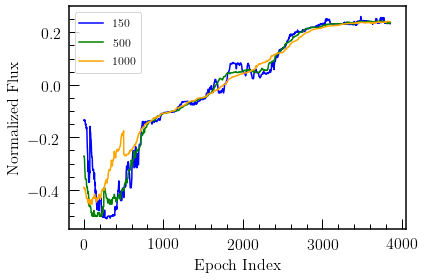

In [111]:
plt.plot(xrange(len(temp1[:,-1])),temp1[:,-1], color = "blue", label = "150")
plt.plot(xrange(len(temp2[:,-1])),temp2[:,-1], color =  "green", label = "500")
plt.plot(xrange(len(temp3[:,-1])),temp3[:,-1], color = "orange", label = "1000")
plt.xlabel("Epoch Index")
plt.ylabel("Normalized Flux")
plt.legend()
plt.tight_layout()
#plt.savefig('./plots/templateTest.png', dpi = 200)


In [88]:
np.shape(temp3)[1]

298

In [98]:
magBins = np.linspace(1,50,np.shape(temp3)[1])
agnBins = np.where(magBins >= 17)[0]

In [113]:
agnBins

array([ 97,  98,  99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109,
       110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122,
       123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135,
       136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148,
       149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161,
       162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174,
       175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187,
       188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200,
       201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213,
       214, 215, 216, 217, 218, 219, 220, 221, 222, 223, 224, 225, 226,
       227, 228, 229, 230, 231, 232, 233, 234, 235, 236, 237, 238, 239,
       240, 241, 242, 243, 244, 245, 246, 247, 248, 249, 250, 251, 252,
       253, 254, 255, 256, 257, 258, 259, 260, 261, 262, 263, 264, 265,
       266, 267, 268, 269, 270, 271, 272, 273, 274, 275, 276, 27

In [73]:
temp2_med = plot_template.smooth_template(lc[:,:,2], smooth=500, image=True,differenced=False)
temp2_diff = plot_template.smooth_template(lc[:,:,2], smooth=500, image=True,differenced=True)

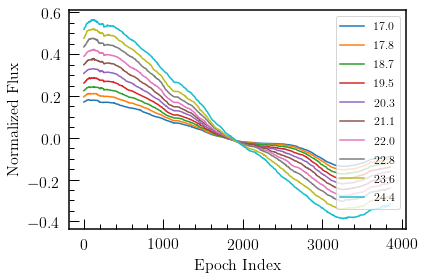

In [108]:
for i in range(0,10):
    plt.plot(xrange(len(temp2_med[:,agnBins[i*5]])),temp2_med[:,agnBins[i*5]], 
             label = "{:3.1f}".format(magBins[agnBins[i*5]]))
plt.xlabel("Epoch Index")
plt.ylabel("Normalized Flux")
plt.legend()
plt.tight_layout()

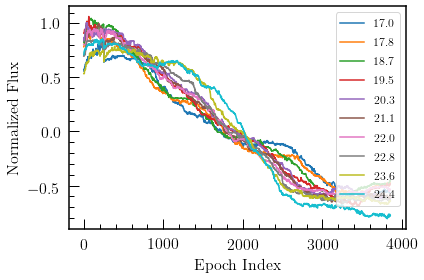

In [106]:
for i in range(0,10):
    plt.plot(xrange(len(temp2_diff[:,agnBins[i*5]])),temp2_diff[:,agnBins[i*5]], 
             label = "{:3.1f}".format(magBins[agnBins[i*5]]))
plt.xlabel("Epoch Index")
plt.ylabel("Normalized Flux")
plt.legend()
plt.tight_layout()

# Testing another channel

In [112]:
ccd = CCD(module=11, channel=2, field='FLUX', campaign=8)
            
cont = PixelMapContainer.from_hdf5(pixmapfile, ccd)
gen = PixMapGenerator(cont)
print "Making", ccd

    
ccd = gen.ccd
flux_range = map(magToFlux,(50,1))
percentiles = np.linspace(0, 100, 300)

lc2 = pixellc.get_pixel_lc(gen, percentiles, flux_range=flux_range)

Making CCD(module=11, channel=2, field='FLUX', campaign=8)


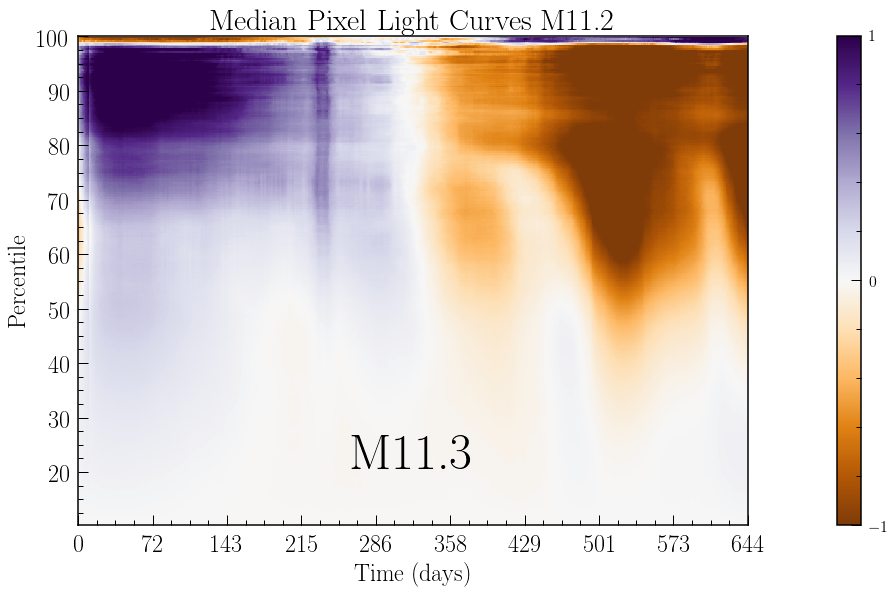

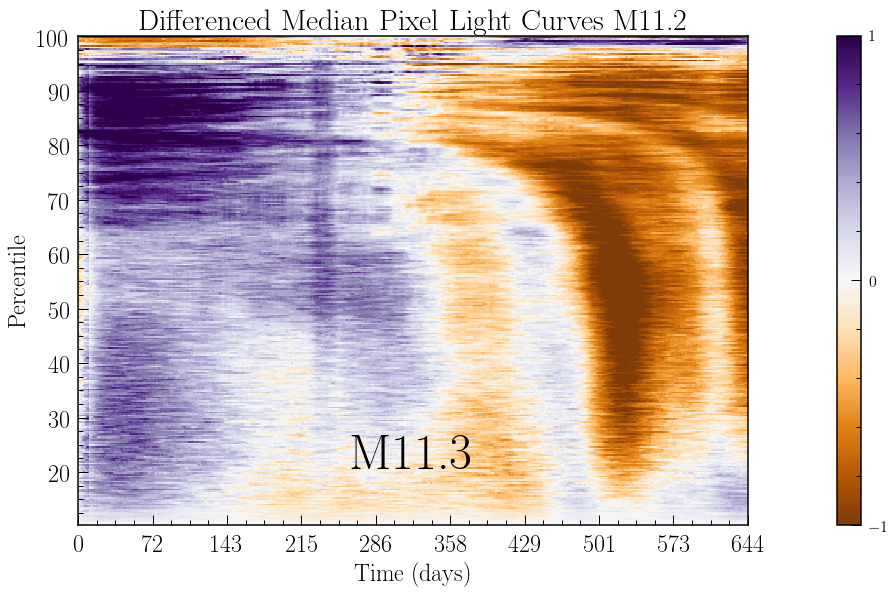

In [121]:
create_pixel_map(gen,lc2)

In [114]:
temp_med = plot_template.smooth_template(lc2[:,:,2], smooth=500, image=True,differenced=False)
temp_diff = plot_template.smooth_template(lc2[:,:,2], smooth=500, image=True,differenced=True)

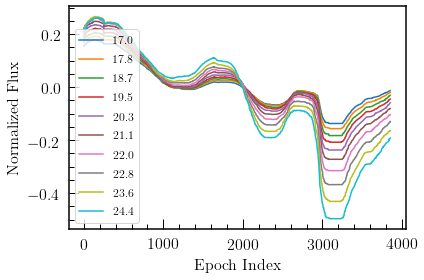

In [116]:
for i in range(0,10):
    plt.plot(xrange(len(temp_med[:,agnBins[i*5]])),temp_med[:,agnBins[i*5]], 
             label = "{:3.1f}".format(magBins[agnBins[i*5]]))
plt.xlabel("Epoch Index")
plt.ylabel("Normalized Flux")
plt.legend()
plt.tight_layout()

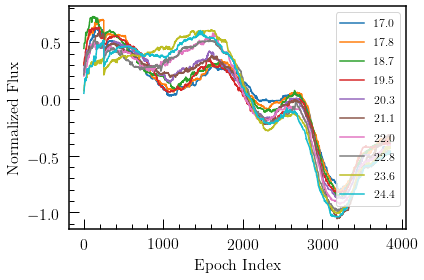

In [117]:
for i in range(0,10):
    plt.plot(xrange(len(temp_diff[:,agnBins[i*5]])),temp_diff[:,agnBins[i*5]], 
             label = "{:3.1f}".format(magBins[agnBins[i*5]]))
plt.xlabel("Epoch Index")
plt.ylabel("Normalized Flux")
plt.legend()
plt.tight_layout()